<a href="https://colab.research.google.com/github/ATPYINACAP/AT/blob/main/ATX_U2_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
import pandas as pd

# Leer el archivo Excel
df = pd.read_excel('/content/drive/MyDrive/01_CBPR01/UNIDAD 02/Salmones.xlsx')

**Actividad 01:**

Considerando los datos de la base “Salmones” en particular los salmones freshwater y sabiendo que estos siguen una distribución normal. Determine la probabilidad de seleccionar un salmón al azar de tal manera que los anillos de crecimiento:

In [90]:
df.columns

Index(['gender', 'freshwater', 'marine', 'region'], dtype='object')

In [91]:
# Act 2

In [92]:
# Calcular mu y Desv. Estándar

mu= df['freshwater'].mean()
sigma=df['freshwater'].std()

# Mostrar mu y De.
mu,sigma

(117.92, 26.00104116019475)

In [93]:
# a) No supere las  115 pulgadas. Grafique sus resultados

# Libreria para cálculos estadísticos
import scipy.stats as stats

# Parámetros de la distribución normal

# Media
mu = df['freshwater'].mean()
# Desviación estándar
sigma = df['freshwater'].std()

# Valor para calcular P(X < x)
x = 115

# Cálculo de la Prob. Acumulada.
prob_a = stats.norm.cdf(x, loc=mu, scale=sigma)

# Mostrar sus resultados
print(f"P(X < {x}) = {round(prob_a,4)}")

P(X < 115) = 0.4553


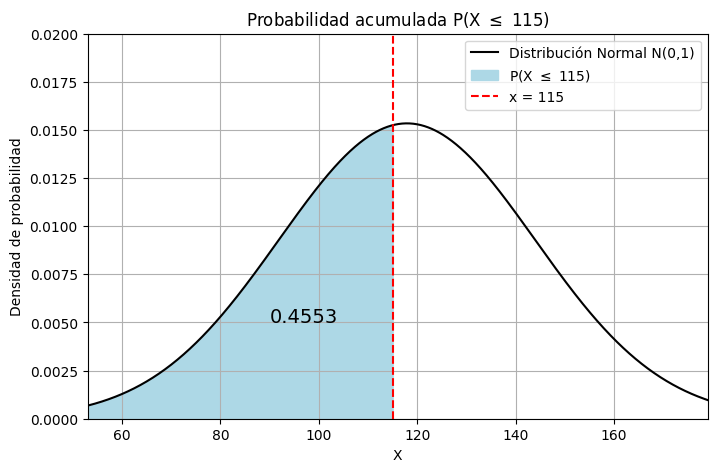

In [94]:
# Libreria para cálculos numericos
import numpy as np

# Libreria para graficas
import matplotlib.pyplot as plt

# Crear valores x para la gráfica
x_vals = np.linspace(df['freshwater'].min(), df['freshwater'].max(), 1000)

# Calcular la función de densidad de probabilidad (PDF)
pdf_vals = stats.norm.pdf(x_vals, loc=mu, scale=sigma)

# Calcular el área bajo la curva hasta x
x_fill = np.linspace(df['freshwater'].min(), x, 1000)

pdf_fill = stats.norm.pdf(x_fill, loc=mu, scale=sigma)

# Crear la gráfica
plt.figure(figsize=(8, 5))
plt.plot(x_vals, pdf_vals, label='Distribución Normal N(0,1)', color='black')
plt.fill_between(x_fill, pdf_fill, color='lightblue', label=f'P(X $\leq$ {x})')
plt.axvline(x, color='red', linestyle='--', label=f'x = {x}')

# Añadir etiquetas y leyenda
plt.title(f'Probabilidad acumulada P(X $\leq$ {x})')
plt.xlabel('X')
plt.ylabel('Densidad de probabilidad')
plt.legend()

# Ajustar el eje x
plt.xlim(df['freshwater'].min(), df['freshwater'].max())
# Ajustar el eje y
plt.ylim(0, 0.02)

# Mostrar el valor de la probabilidad dentro del área
plt.text(90, 0.005, f'{prob_a:.4f}', fontsize=14, color='black')

# Mostrar la gráfica
plt.grid(True)
plt.show()


In [95]:
# b) Esten entre  110 y 120 pulgadas
# Parámetros de la distribución normal
mu = df['freshwater'].mean() # Media
sigma = df['freshwater'].std() # Desviación estándar

x1 = 110  # Valor para calcular P(X < x)
x2 = 120  # Valor para calcular P(X < x)

# Calcular la probabilidad acumulada P(X < x1)
prob_x1 = stats.norm.cdf(x1, loc=mu, scale=sigma)

# Calcular la probabilidad acumulada P(X < x2)
prob_x2 = stats.norm.cdf(x2, loc=mu, scale=sigma)

# Calcular la probabilidad de estar entre x1 y x2
prob_b = prob_x2 - prob_x1

# Mostrar resultados
print(f"P({x1 }< X < {x2 }) = {round(prob_b,4)}")

P(110< X < 120) = 0.1515


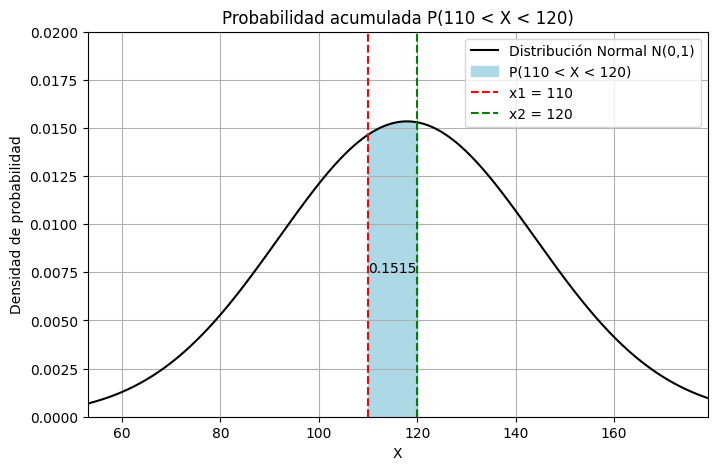

In [96]:
# Calcular la probabilidad acumulada P(x1 < X < x2)

# Crear valores x para la gráfica
x_vals = np.linspace(df['freshwater'].min(), df['freshwater'].max(),  1000)

# Calcular la función de densidad de probabilidad (PDF)
pdf_vals = stats.norm.pdf(x_vals, loc=mu, scale=sigma)

# Calcular el área bajo la curva entre a y b
x_fill = np.linspace(x1, x2, 1000)
pdf_fill = stats.norm.pdf(x_fill, loc=mu, scale=sigma)

# Crear la gráfica
plt.figure(figsize=(8, 5))
plt.plot(x_vals, pdf_vals, label='Distribución Normal N(0,1)', color='black')
plt.fill_between(x_fill, pdf_fill, color='lightblue', label=f'P({x1} < X < {x2})')
plt.axvline(x1, color='red', linestyle='--', label=f'x1 = {x1}')
plt.axvline(x2, color='green', linestyle='--', label=f'x2 = {x2}')

# Ajustar el eje x
plt.xlim(df['freshwater'].min(), df['freshwater'].max())

# Ajustar el eje y
plt.ylim(0, 0.02)


# Mostrar el valor de la probabilidad dentro del área
plt.text(110, 0.0075, f'{prob_b:.4f}', fontsize=10, color='black')

# Añadir etiquetas y leyenda
plt.title(f'Probabilidad acumulada P({x1} < X < {x2})')
plt.xlabel('X')
plt.ylabel('Densidad de probabilidad')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()


In [97]:
# c) Tienen al menos 110 pulgadas. Grafique su resultado

# Parámetros de la distribución normal
mu = df['freshwater'].mean() # Media
sigma = df['freshwater'].std() # Desviación estándar

x1 = 110  # Valor para calcular P(X >= x)

prob_x1 = stats.norm.cdf(x1, loc=mu, scale=sigma)

prob_c = 1-prob_x1

print(f"P(X > {x1 }) = {round(prob_c,4)}")

P(X > 110) = 0.6197


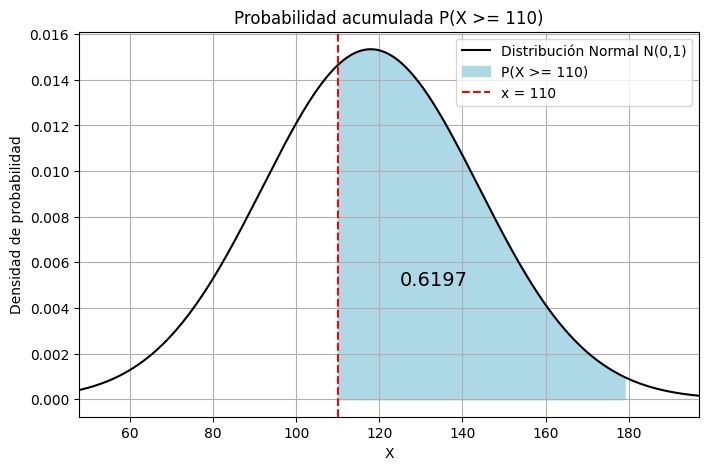

In [98]:
# Crear valores x para la gráfica
x_vals = np.linspace(0.85*df['freshwater'].min(), 1.15*df['freshwater'].max(), 1000)

# Calcular la función de densidad de probabilidad (PDF)
pdf_vals = stats.norm.pdf(x_vals, loc=mu, scale=sigma)

# Calcular el área bajo la curva para P(X >= x)
x_fill = np.linspace(x1, df['freshwater'].max(), 1000)
pdf_fill = stats.norm.pdf(x_fill, loc=mu, scale=sigma)

# Crear la gráfica
plt.figure(figsize=(8, 5))
plt.plot(x_vals, pdf_vals, label='Distribución Normal N(0,1)', color='black')
plt.fill_between(x_fill, pdf_fill, color='lightblue', label=f'P(X >= {x1})')
plt.axvline(x1, color='red', linestyle='--', label=f'x = {x1}')

# Ajustar límites de los ejes
plt.xlim(0.9*df['freshwater'].min(), 1.1*df['freshwater'].max())  # Ajustar el eje x
#plt.ylim(0, 0.5)  # Ajustar el eje y

# Mostrar el valor de la probabilidad dentro del área
plt.text(125, 0.005, f'{prob_c:.4f}', fontsize=14, color='black')

# Añadir etiquetas y leyenda
plt.title(f'Probabilidad acumulada P(X >= {x1})')
plt.xlabel('X')
plt.ylabel('Densidad de probabilidad')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()


**ACTIVIDAD 02:**

Considere Salmones marine machos de región de  Alaska


In [99]:
df.columns

Index(['gender', 'freshwater', 'marine', 'region'], dtype='object')

In [100]:
# Filtrar considerando ambos criterios
filtro1=df[(df['gender'] == 1) & (df['region'] == 0)]

# Reset del indice
filtro1.reset_index(drop=True, inplace=True)


In [101]:
# a) Determine media y desviación estándar

# Media
mu = filtro1['marine'].mean()
# Desviación estándar
sigma = filtro1['marine'].std()

mu.round(2),sigma.round(4)

(368.88, 32.1973)

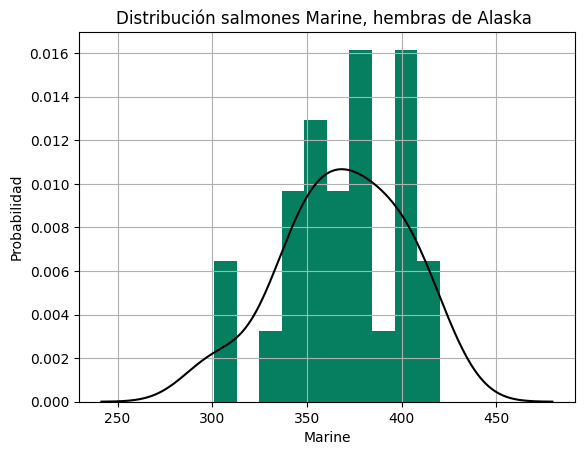

In [102]:
# b) Realice histograma y densidad

# Libreria para graficos
import matplotlib.pyplot as plt

# Crear histograma con su densidad color personalizado del histograma
ax = filtro1['marine'].plot.hist(density=True,color='#067f61')

# Color personalizado densidad
filtro1['marine'].plot.kde(ax=ax,color='black')

# Etiqueta eje x
plt.xlabel("Marine")

# Etiqueta eje y
plt.ylabel("Probabilidad")

# Titulo grafico
plt.title("Distribución salmones Marine, hembras de Alaska ")

# Mostrar grafico
plt.grid(True)
plt.show()


In [103]:
#c) Calcule la probabilidad  de que al seleccionar Salmones marine hembras
#   de región de Canadá que su  anillos de crecimiento sea de a lo más 320 pulgadas
#  ¿Cuantos especímenes serían aproximadamente?. Grafique su resultado

# Parámetros de la distribución normal

# Media
mu = filtro1['marine'].mean()
# Desviación estándar
sigma = filtro1['marine'].std()

# Valor para calcular P(X < x)
x = 320

# Cálculo de la Prob. Acumulada.
prob_2c = stats.norm.cdf(x, loc=mu, scale=sigma)

# Cuantos especímenes serían aproximadamente
cant=prob_2c*len(filtro1)

# Mostrar sus resultados
print(f"P(X < {x}) = {round(prob_2c,4)}")
print(f"Corresponden a : {round(cant)} Aprox.")

P(X < 320) = 0.0645
Corresponden a : 2 Aprox.


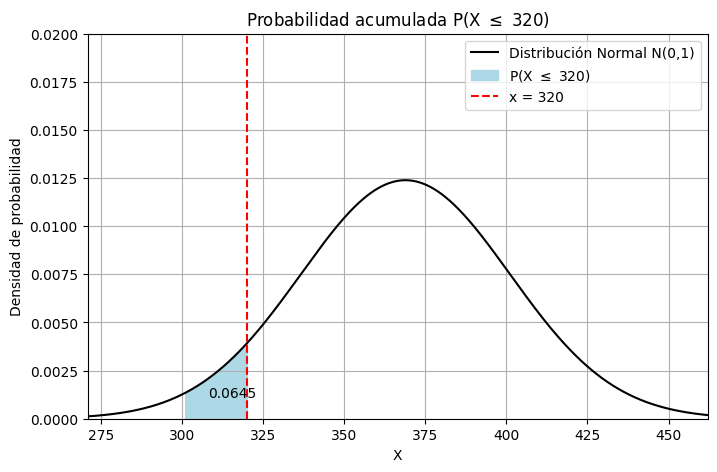

In [104]:
# Crear valores x para la gráfica
x_vals = np.linspace(0.85*filtro1['marine'].min(), 1.15*filtro1['marine'].max(), 1000)

# Calcular la función de densidad de probabilidad (PDF)
pdf_vals = stats.norm.pdf(x_vals, loc=mu, scale=sigma)

# Calcular el área bajo la curva hasta x
x_fill = np.linspace(filtro1['marine'].min(), x, 1000)

pdf_fill = stats.norm.pdf(x_fill, loc=mu, scale=sigma)

# Crear la gráfica
plt.figure(figsize=(8, 5))
plt.plot(x_vals, pdf_vals, label='Distribución Normal N(0,1)', color='black')
plt.fill_between(x_fill, pdf_fill, color='lightblue', label=f'P(X $\leq$ {x})')
plt.axvline(x, color='red', linestyle='--', label=f'x = {x}')

# Añadir etiquetas y leyenda
plt.title(f'Probabilidad acumulada P(X $\leq$ {x})')
plt.xlabel('X')
plt.ylabel('Densidad de probabilidad')
plt.legend()

# Ajustar el eje x
plt.xlim(0.9*filtro1['marine'].min(), 1.1*filtro1['marine'].max())
# Ajustar el eje y
plt.ylim(0, 0.02)

# Mostrar el valor de la probabilidad dentro del área
plt.text(308, 0.0011125, f'{prob_2c:.4f}', fontsize=10, color='black')

# Mostrar la gráfica
plt.grid(True)
plt.show()


**ACTIVIDAD 03:**

Considere Salmones marine hembras de región de Canadá


In [105]:
# Filtrar considerando ambos criterios
filtro2=df[(df['gender'] == 0) & (df['region'] == 1)]

# Reset del indice
filtro2.reset_index(drop=True, inplace=True)

In [106]:
# a) Determine media y desviación estándar

# Media
mu = filtro2['marine'].mean()
# Desviación estándar
sigma = filtro2['marine'].std()

mu.round(2),sigma.round(4)

(436.17, 41.2592)

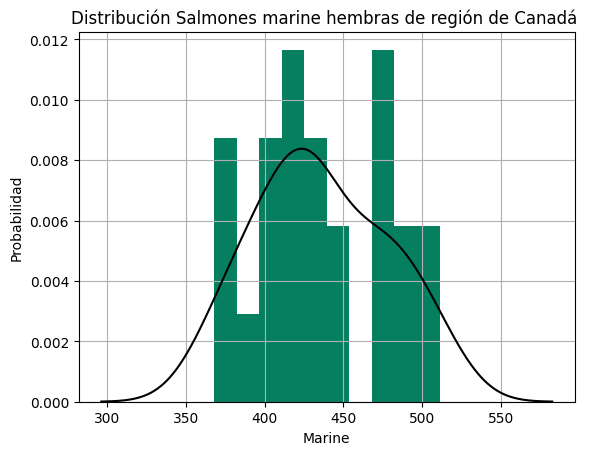

In [107]:
# b) Realice histograma y densidad

# Libreria para graficos
import matplotlib.pyplot as plt

# Crear histograma con su densidad color personalizado del histograma
ax = filtro2['marine'].plot.hist(density=True,color='#067f61')

# Color personalizado densidad
filtro2['marine'].plot.kde(ax=ax,color='black')

# Etiqueta eje x
plt.xlabel("Marine")

# Etiqueta eje y
plt.ylabel("Probabilidad")

# Titulo grafico
plt.title("Distribución Salmones marine hembras de región de Canadá ")

# Mostrar grafico
plt.grid(True)
plt.show()


In [108]:
# c) Calcule la probabilidad  de que al seleccionar Salmones marine hembras de región de Canadá
#    que su  anillos de crecimiento sea mayor a 400 pulgadas
#   ¿Cuantos especímenes serían aproximadamente?

# Parámetros de la distribución normal
mu = filtro2['marine'].mean() # Media
sigma = filtro2['marine'].std() # Desviación estándar

x1 = 400  # Valor para calcular P(X >= x)

prob_x1 = stats.norm.cdf(x1, loc=mu, scale=sigma)


prob_3c = 1-prob_x1

# Cuantos especímenes serían aproximadamente
cant=prob_3c*len(filtro2)

print(f"P(X > {x1 }) = {round(prob_3c,4)}")
print(f"Corresponden a : {round(cant)} Aprox.")

P(X > 400) = 0.8096
Corresponden a : 19 Aprox.


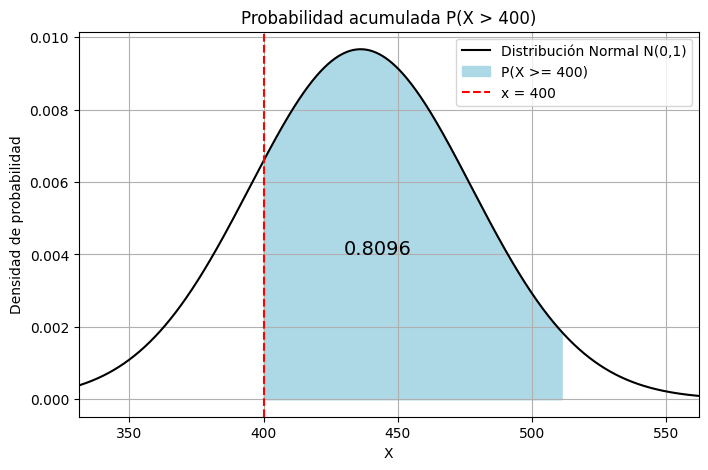

In [109]:
# Crear valores x para la gráfica
x_vals = np.linspace(0.85*filtro2['marine'].min(), 1.15*filtro2['marine'].max(), 1000)

# Calcular la función de densidad de probabilidad (PDF)
pdf_vals = stats.norm.pdf(x_vals, loc=mu, scale=sigma)

# Calcular el área bajo la curva para P(X >= x)
x_fill = np.linspace(x1, filtro2['marine'].max(), 1000)
pdf_fill = stats.norm.pdf(x_fill, loc=mu, scale=sigma)

# Crear la gráfica
plt.figure(figsize=(8, 5))
plt.plot(x_vals, pdf_vals, label='Distribución Normal N(0,1)', color='black')
plt.fill_between(x_fill, pdf_fill, color='lightblue', label=f'P(X >= {x1})')
plt.axvline(x1, color='red', linestyle='--', label=f'x = {x1}')

# Ajustar límites de los ejes
plt.xlim(0.9*filtro2['marine'].min(), 1.1*filtro2['marine'].max())  # Ajustar el eje x
#plt.ylim(0, 0.5)  # Ajustar el eje y

# Mostrar el valor de la probabilidad dentro del área
plt.text(430, 0.004, f'{prob_3c:.4f}', fontsize=14, color='black')

# Añadir etiquetas y leyenda
plt.title(f'Probabilidad acumulada P(X > {x1})')
plt.xlabel('X')
plt.ylabel('Densidad de probabilidad')
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()
